Import libraries

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

Open data

In [157]:
data = pd.read_csv("D:\python\Mall_Customers\Mall_Customers_data.csv")

print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Print shape data

In [158]:
print(data.shape)

(200, 5)


Print the values ​​of each column

In [159]:
for col in data.columns:
    print('\n', data[col].value_counts())


 CustomerID
1      1
2      1
3      1
4      1
5      1
      ..
196    1
197    1
198    1
199    1
200    1
Name: count, Length: 200, dtype: int64

 Genre
Female    112
Male       88
Name: count, dtype: int64

 Age
32    11
35     9
31     8
19     8
30     7
49     7
23     6
40     6
36     6
27     6
47     6
38     6
50     5
20     5
21     5
29     5
48     5
34     5
67     4
54     4
24     4
59     4
18     4
28     4
22     3
25     3
46     3
43     3
39     3
60     3
45     3
37     3
33     3
68     3
58     2
41     2
52     2
57     2
65     2
53     2
51     2
42     2
70     2
44     2
26     2
63     2
66     2
64     1
69     1
55     1
56     1
Name: count, dtype: int64

 Annual Income (k$)
54     12
78     12
60      6
48      6
63      6
       ..
101     2
113     2
120     2
126     2
137     2
Name: count, Length: 64, dtype: int64

 Spending Score (1-100)
42    8
55    7
73    6
46    6
48    5
     ..
68    1
85    1
23    1
8     1
18    1
Name: count, L

Remove outlier column

In [160]:
data.drop('CustomerID', axis=1, inplace=True)

Print data structure

In [161]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


Mathematical data statistics

In [162]:
print(data.describe())

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


Number of empty cells

In [163]:
print(data.isnull().sum())

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Duplicates

In [164]:
print(data.duplicated().sum())

0


Change column name

In [165]:
data.rename(columns={"Age": "Age (year)"}, inplace=True)

Normalization

In [166]:
label = LabelEncoder()
data['Genre'] = label.fit_transform(data['Genre'])

The best number of clusters

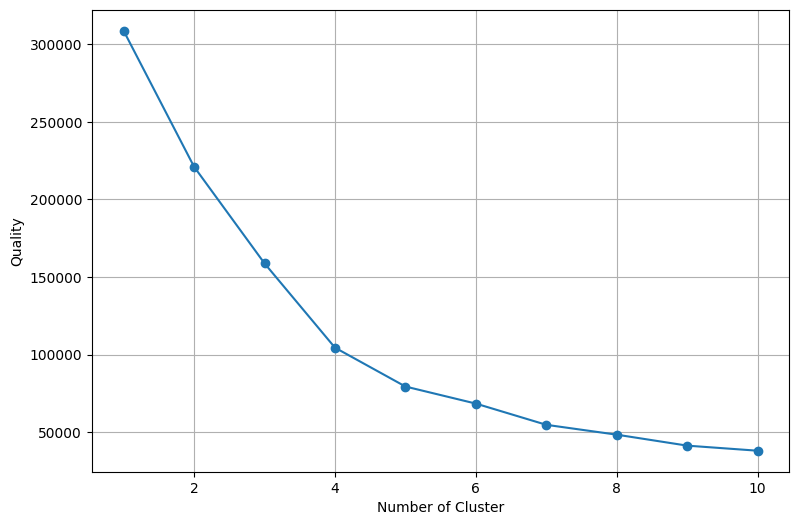

In [167]:
cluster_quality = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    cluster_quality.append(kmeans.inertia_)

plt.figure(figsize=(9, 6))
plt.plot(range(1, 11), cluster_quality, marker='o')
plt.ylabel("Quality")
plt.xlabel("Number of Cluster")
plt.grid()
plt.show()

Category

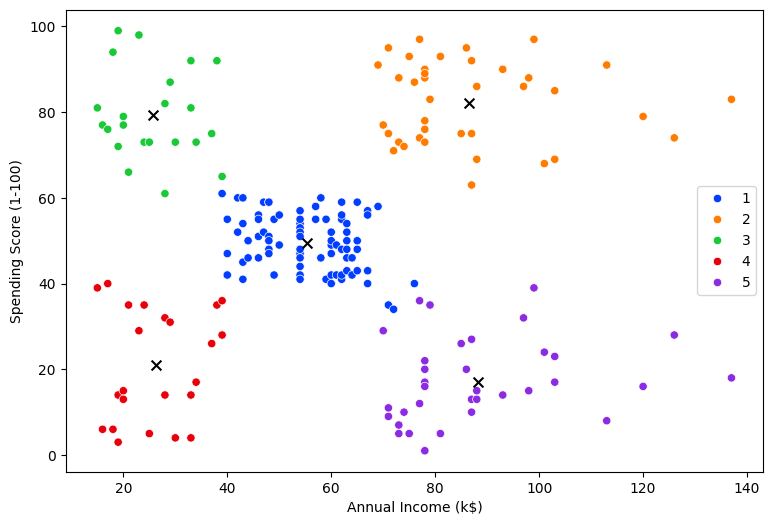

In [168]:
x = data.iloc[:, [2, 3]].values

kmeans = KMeans(n_clusters=5)
kmeans.fit(x)

center_kmeans = kmeans.cluster_centers_
label_kmeans = kmeans.labels_

data['Cluster'] = kmeans.predict(x)

data['Cluster'] = data['Cluster'].values + 1

plt.figure(figsize=(9, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='bright')
plt.scatter(center_kmeans[:, 0], center_kmeans[:, 1], c='black', marker='x', s=50)
plt.legend()
plt.show()

Heatmap chart

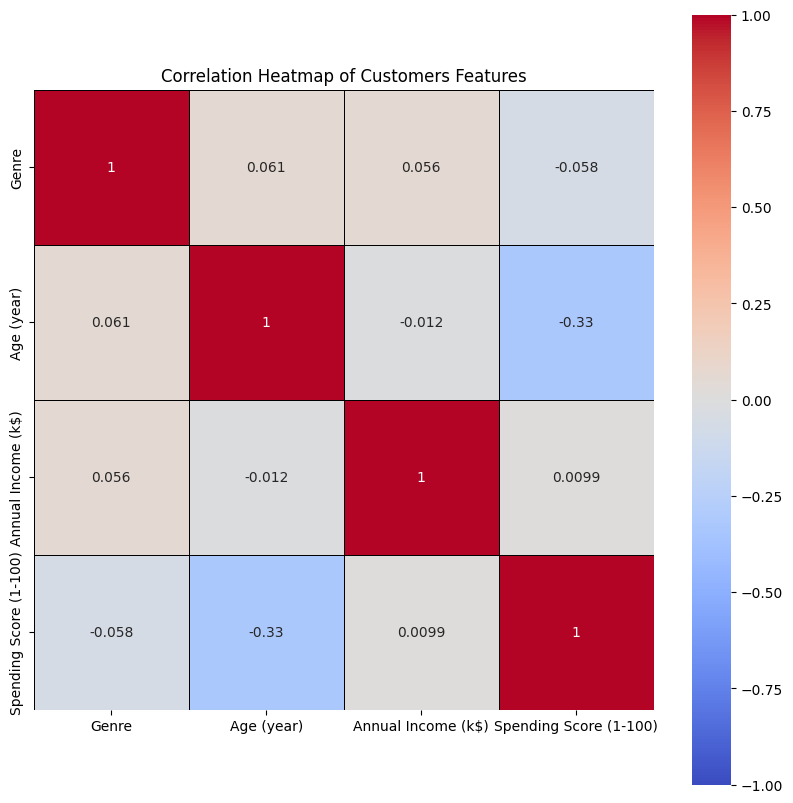

In [169]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop('Cluster', axis=1).corr(), cmap='coolwarm', annot=True,
            linewidths=0.5, linecolor='black', square=True, vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap of Customers Features")
plt.show()

Return values

In [170]:
x = ['A', 'B', 'C', 'D', 'E']
y = dict(zip(data.groupby('Cluster')['Annual Income (k$)'].mean().sort_values(ascending=False).index.to_list(), x))

data['Cluster'] = data['Cluster'].replace(y.keys(), y.values())
data['Genre'] = label.inverse_transform(data['Genre'])

Chart of counting values

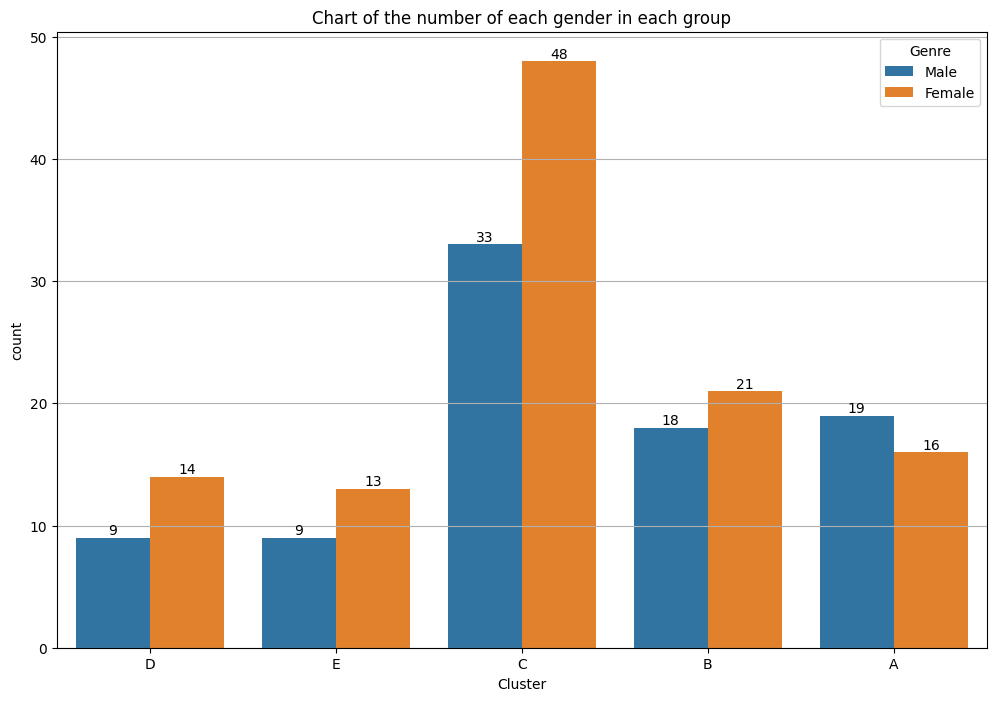

In [171]:
plt.figure(figsize=(12, 8))

s_cp = sns.countplot(data=data, x='Cluster', hue='Genre')
s_cp.bar_label(s_cp.containers[0])
s_cp.bar_label(s_cp.containers[1])

plt.title("Chart of the number of each gender in each group")
plt.grid(axis="y")

plt.show()

Sex percentage chart

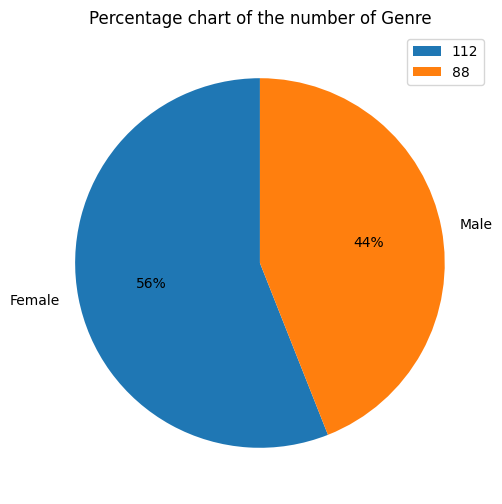

In [172]:
plt.figure(figsize=(6, 6))

plt.pie(data['Genre'].value_counts(), labels=data['Genre'].value_counts().index, autopct='%1.0f%%',
        startangle=90)
plt.title("Percentage chart of the number of Genre")
plt.legend(data['Genre'].value_counts())

plt.show()

Histogram chart

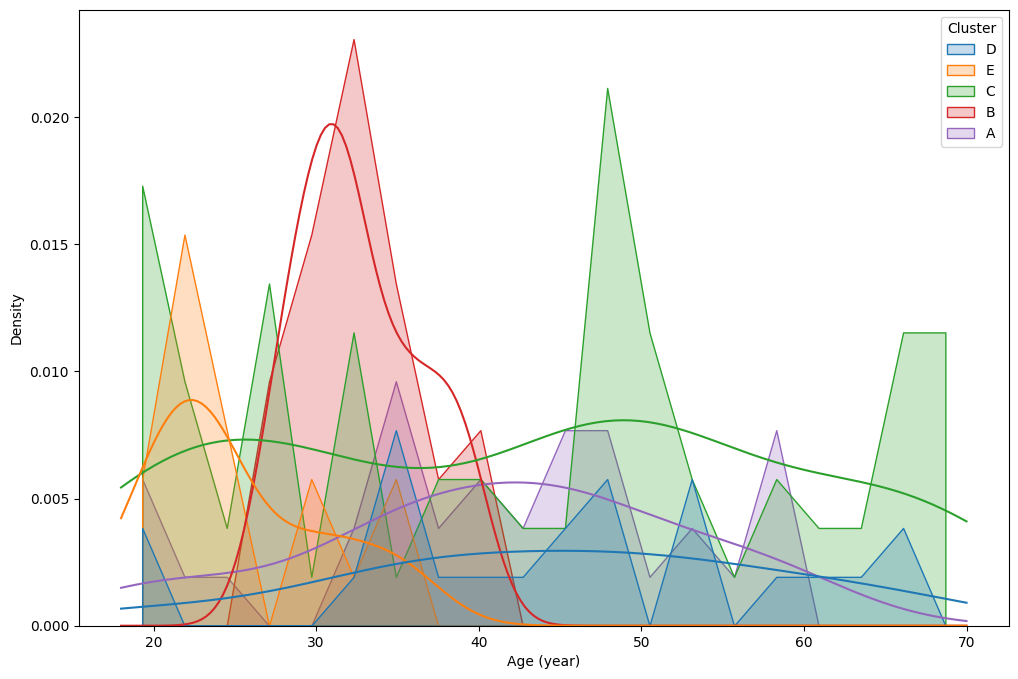

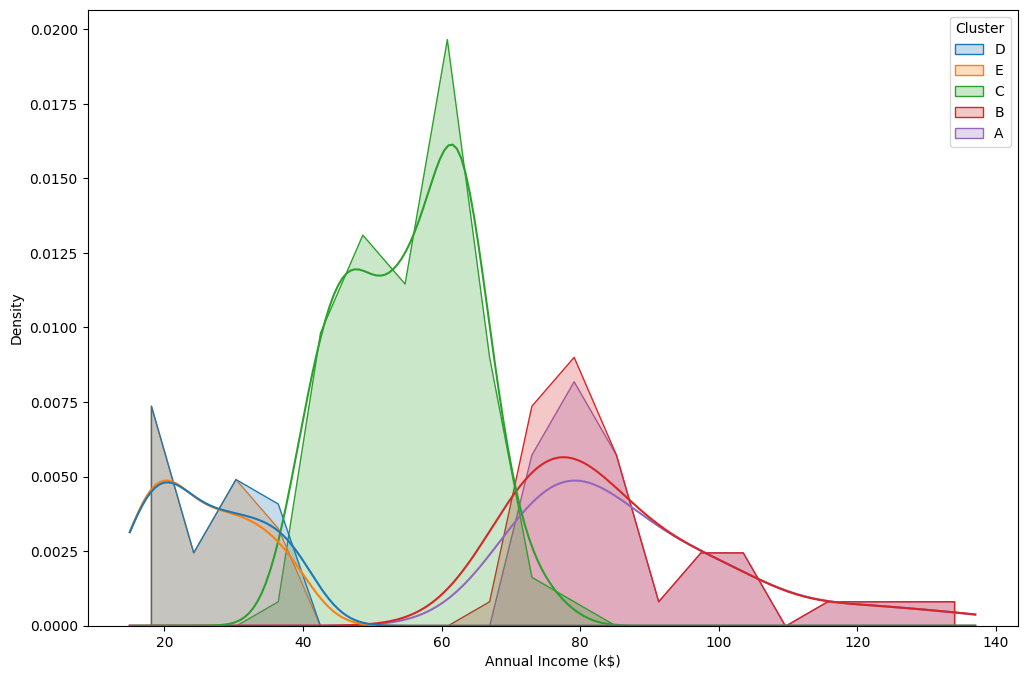

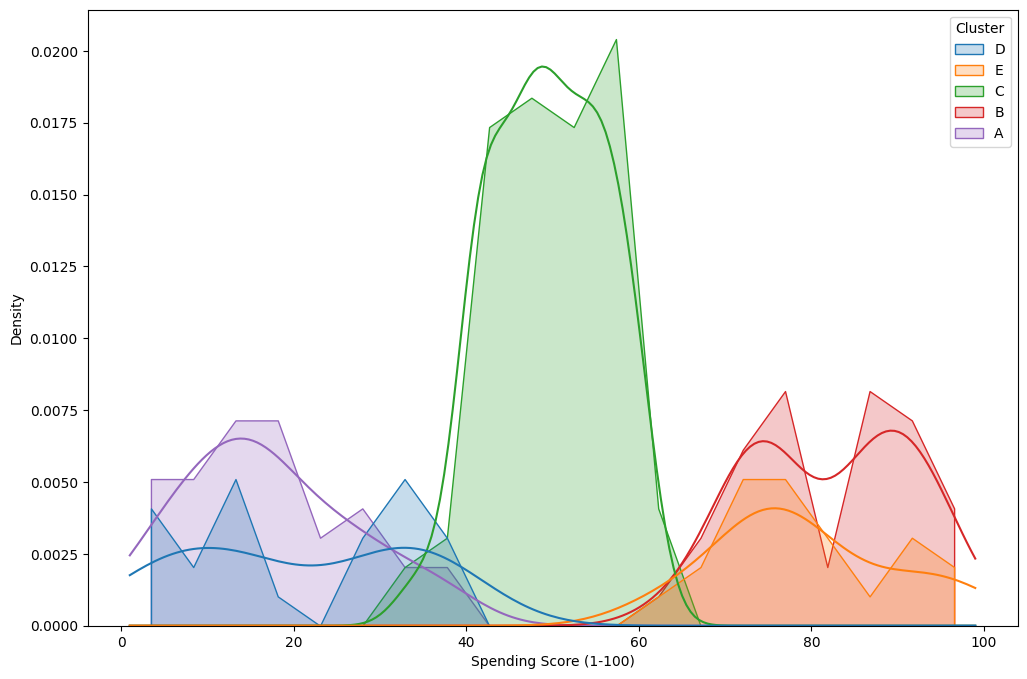

In [173]:
def hist_chart(col):
    plt.figure(figsize=(12, 8))
    sns.histplot(data=data, x=col, bins=20, kde=True, hue='Cluster',
                 element='poly', stat='density')
    plt.show()

hist_chart('Age (year)')
hist_chart('Annual Income (k$)')
hist_chart('Spending Score (1-100)')

Box chart

C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8824\3188677017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y=col, width=0.6, palette='bright')


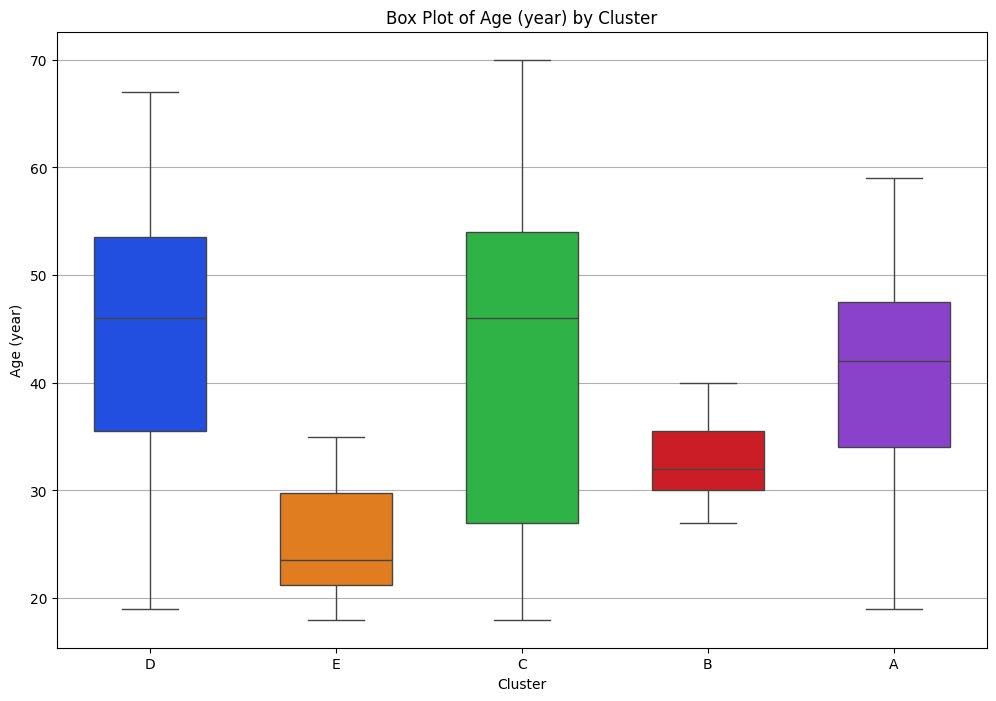

C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8824\3188677017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y=col, width=0.6, palette='bright')


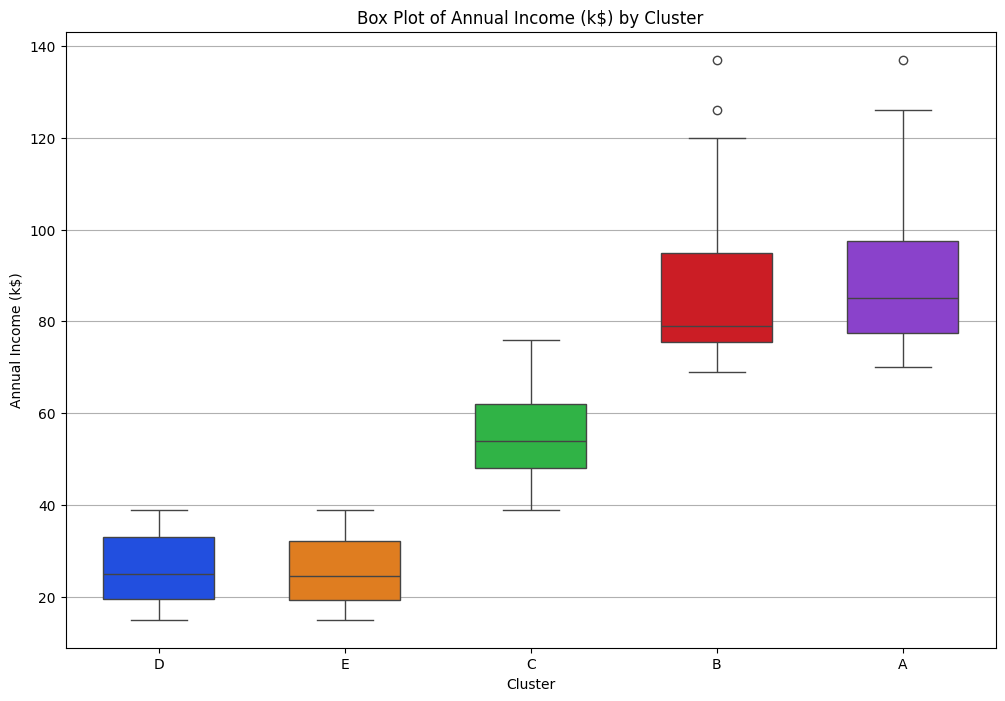

C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8824\3188677017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y=col, width=0.6, palette='bright')


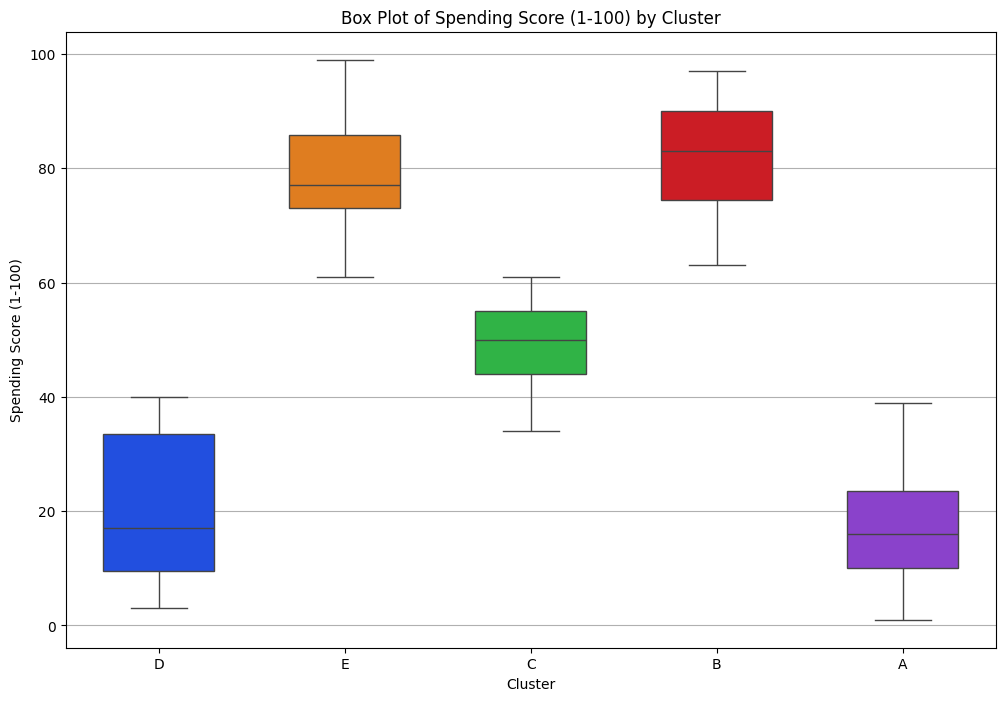

In [174]:
def box_chart(col):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data, x='Cluster', y=col, width=0.6, palette='bright')

    plt.grid(axis='y')
    plt.title(f"Box Plot of {col} by Cluster")

    plt.show()

for i in data.select_dtypes('int64'):
    box_chart(i)

Pairwise Relationships of Iris Flower Features

<Figure size 1200x1200 with 0 Axes>

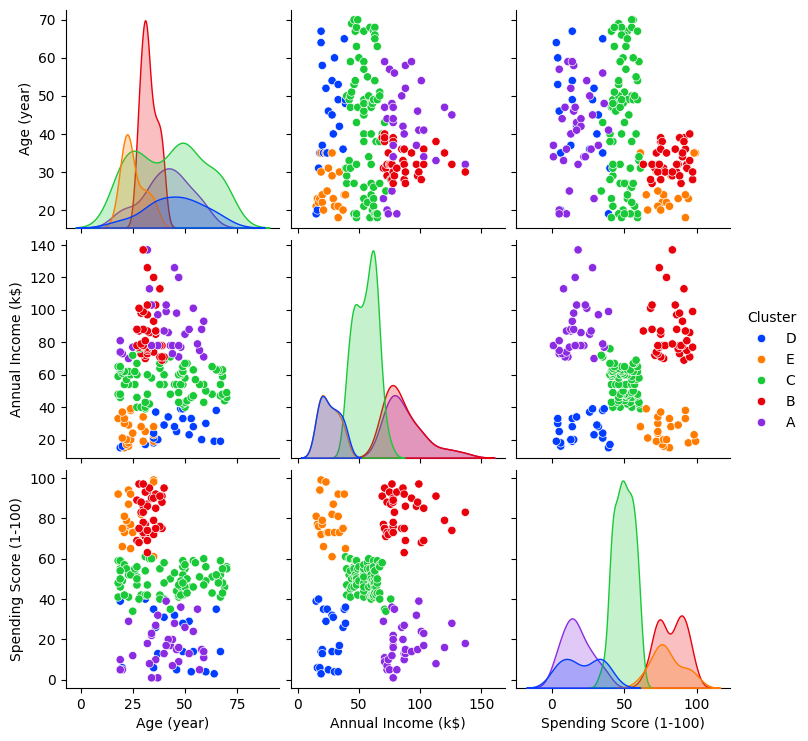

In [175]:
plt.figure(figsize=(12, 12))
sns.pairplot(data=data, hue='Cluster', kind='scatter', palette='bright')
plt.show()

Min-Max chart

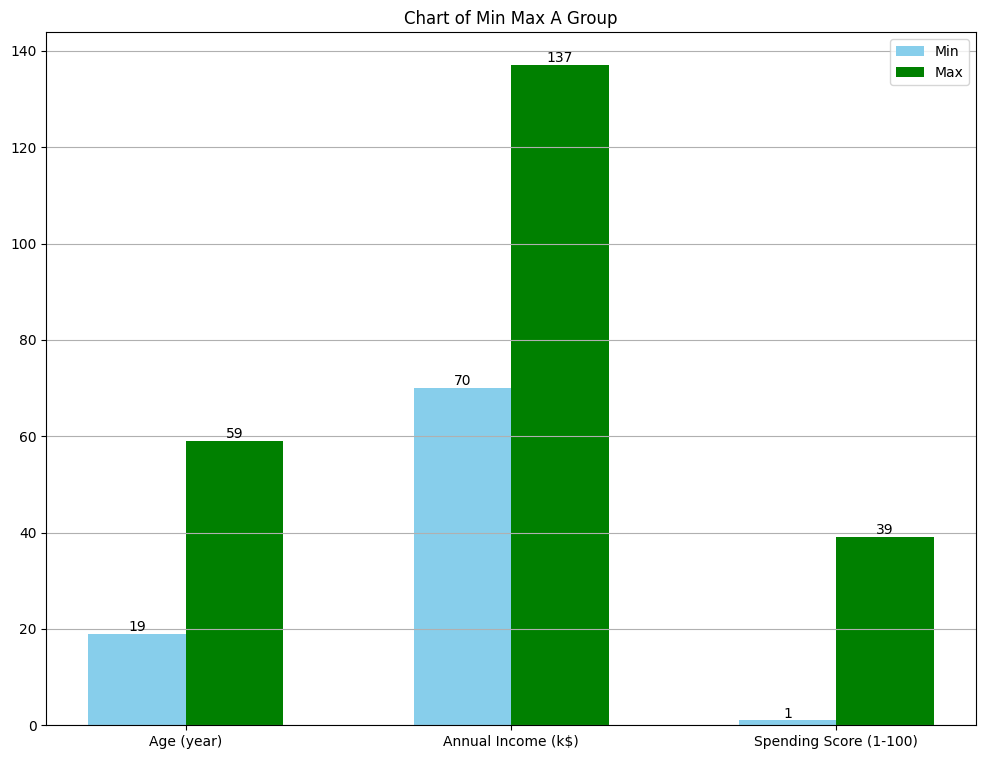

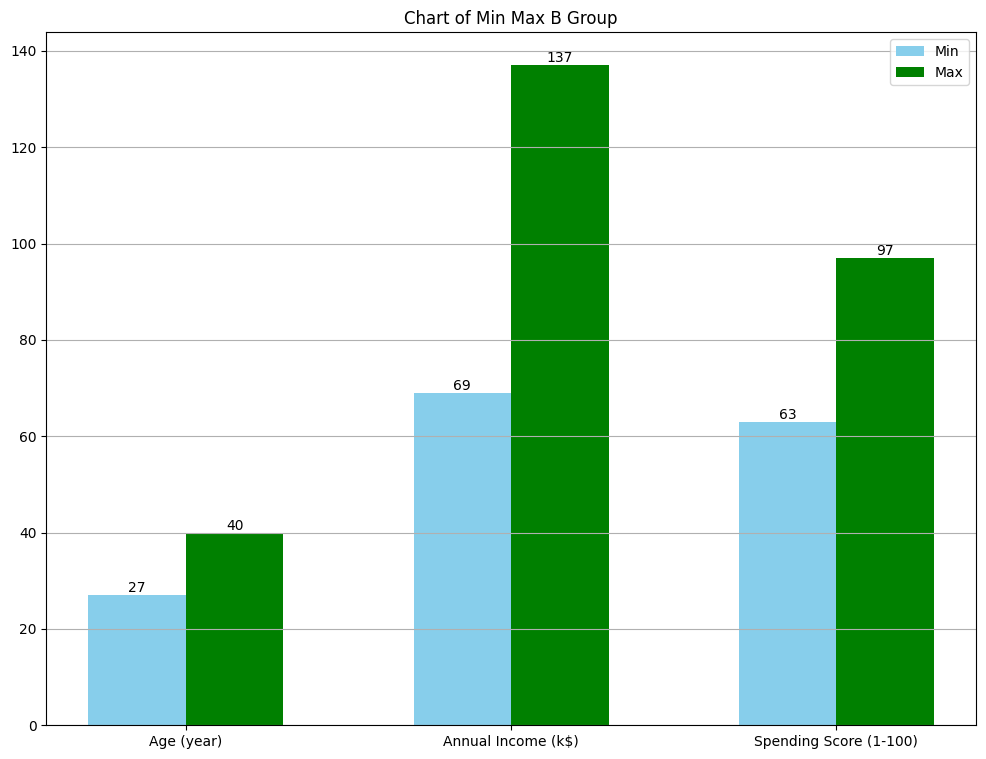

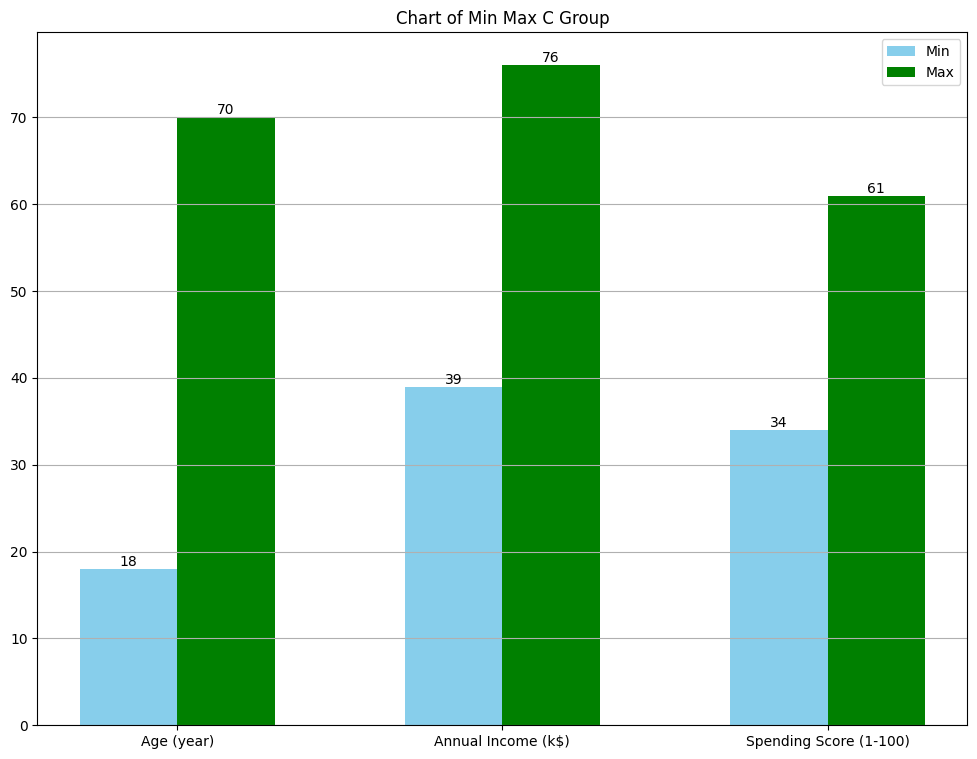

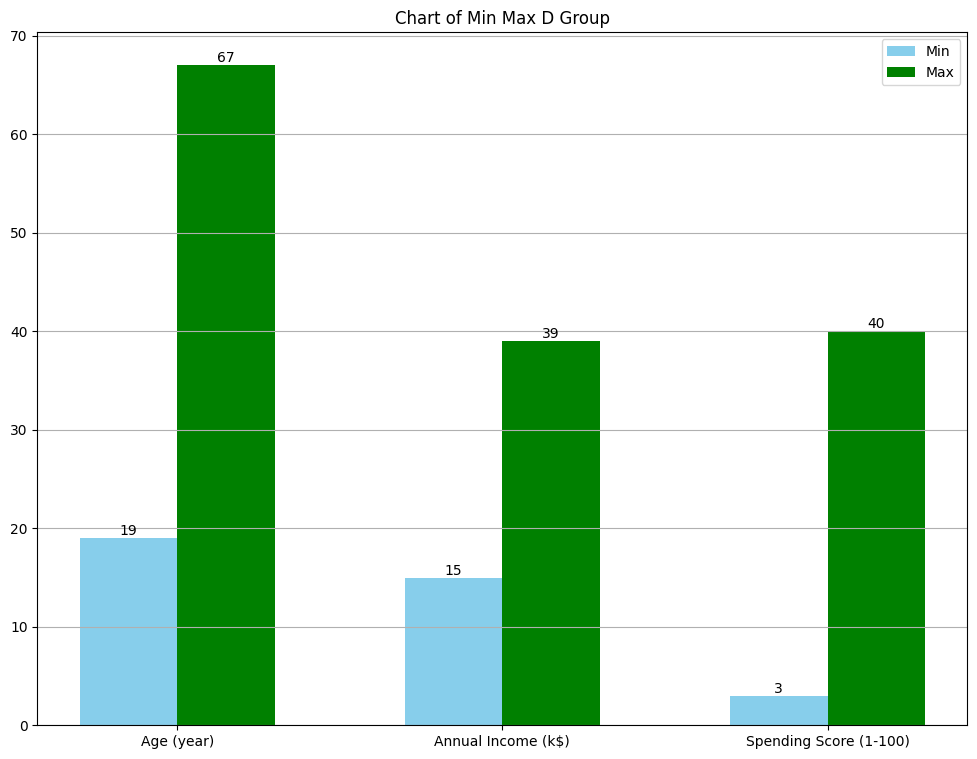

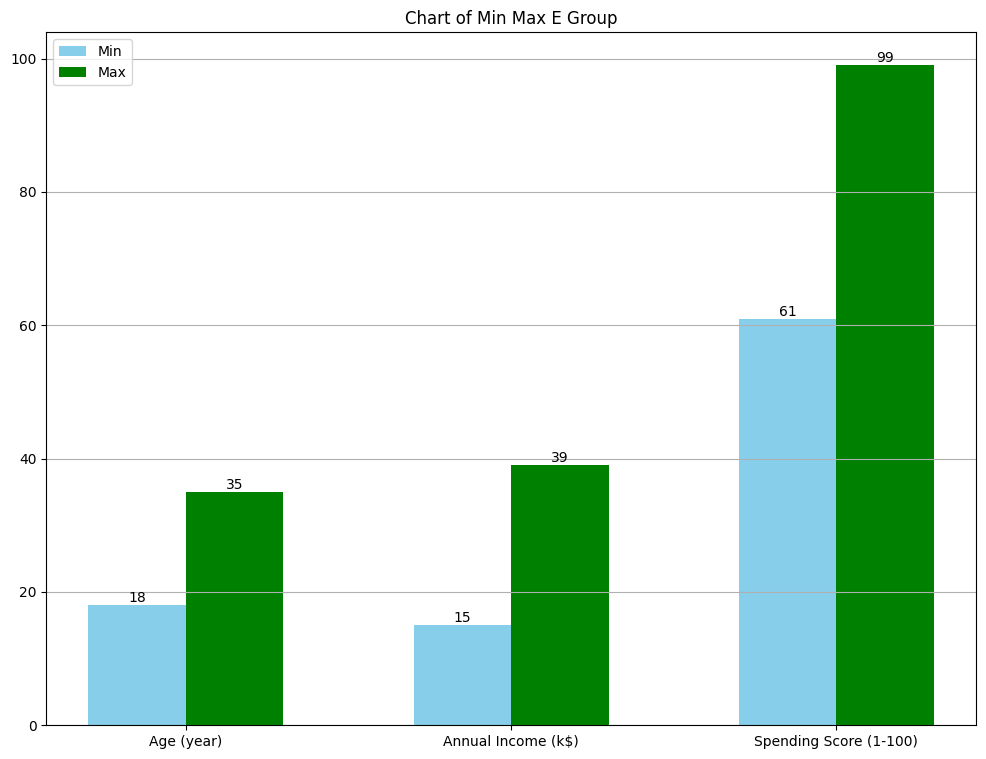

In [176]:
def min_max_chart(quantity):
    # data classification
    min_data = data[data['Cluster'] == quantity].select_dtypes('int64').describe().T['min']
    max_data = data[data['Cluster'] == quantity].select_dtypes('int64').describe().T['max']

    #definition of variables
    thickness = 0.3
    number_columns = np.arange(len(min_data.index))
    gride_min_max_chart = ["Min", "Max"]

    #draw a diagram
    plt.figure(figsize=(12, 9))
    plt.bar(number_columns - (thickness/2), height=min_data, width=thickness, color='skyblue')
    plt.bar(number_columns + (thickness/2), height=max_data, width=thickness, color='green')

    for i, j in enumerate(min_data):
        plt.text(i - (thickness/2), j, int(j), ha='center', va='bottom', fontsize=10, color='black')
    for i, j in enumerate(max_data):
        plt.text(i + (thickness/2), j, int(j), ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Chart of Min Max {quantity} Group")
    plt.xticks(number_columns, min_data.index)
    plt.legend(gride_min_max_chart)
    plt.grid(axis='y')

    plt.show()

for i in data['Cluster'].value_counts().sort_index().index:
    min_max_chart(i)

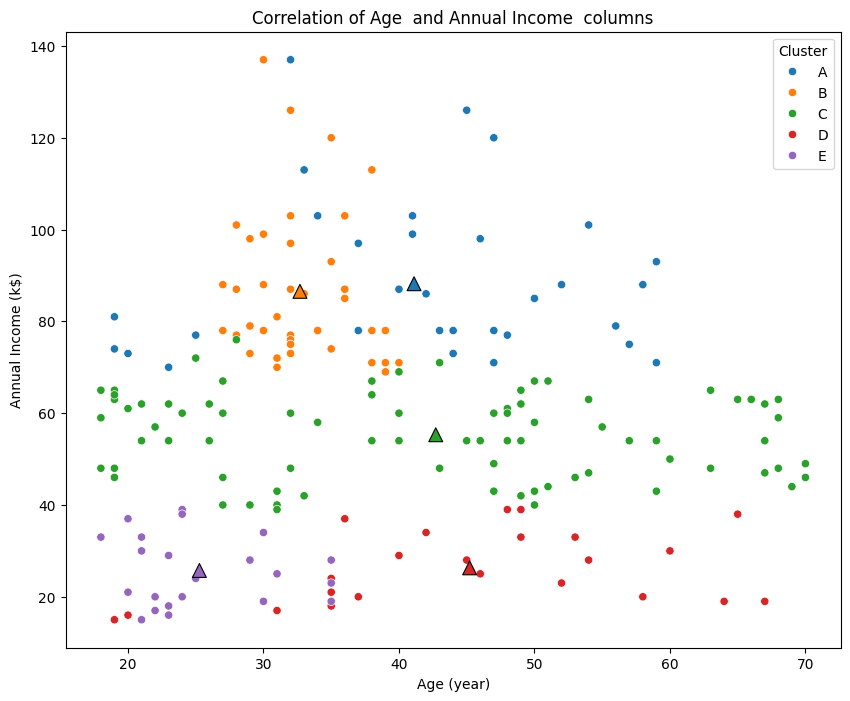

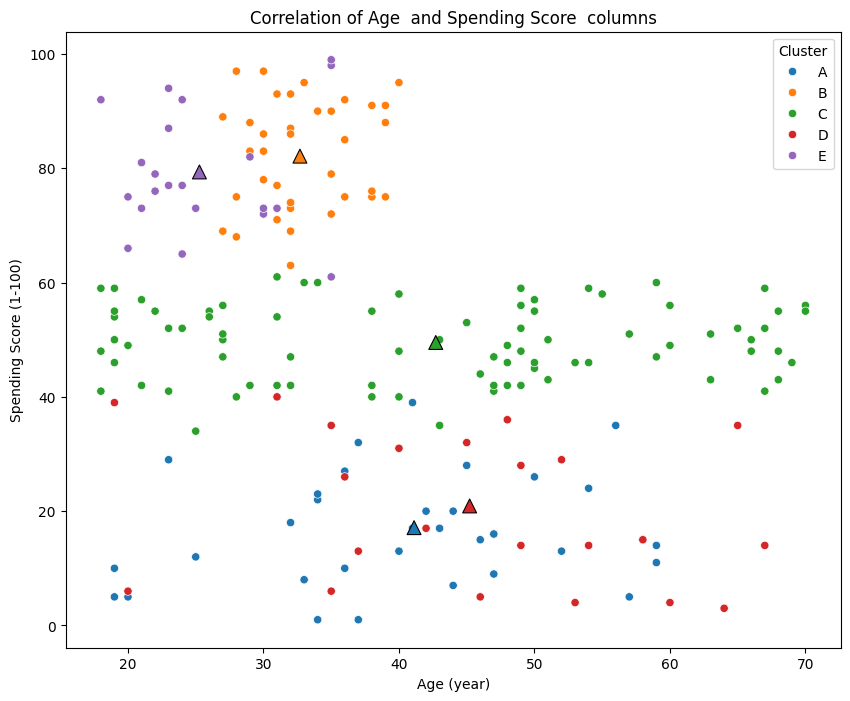

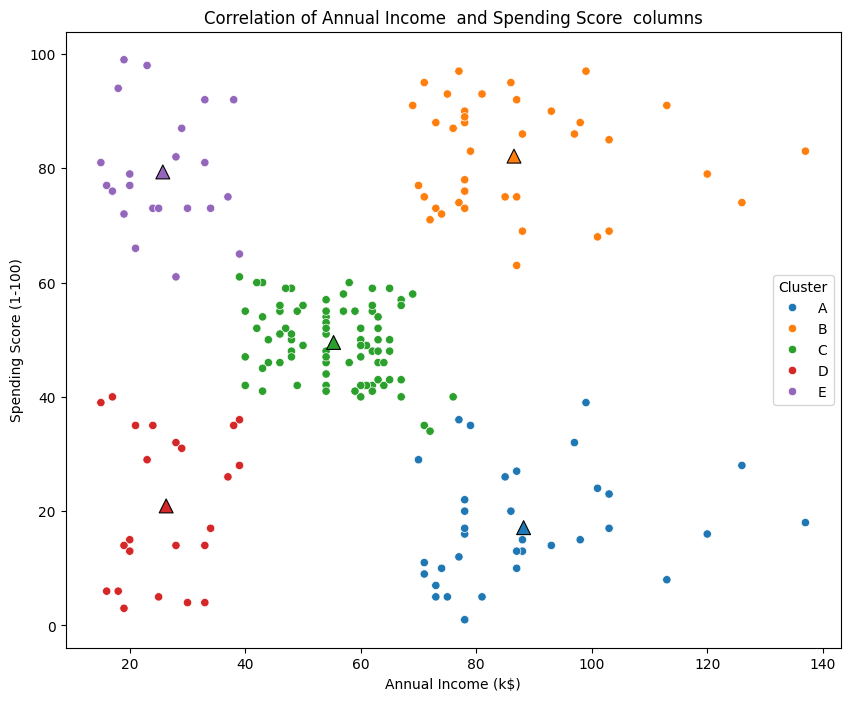

In [177]:
list_columns = list(combinations(data.select_dtypes("int64").columns, 2))
mean_data = data.drop('Genre', axis=1).groupby('Cluster').mean()

def scatter_chart(col1, col2):
    axis1 = i.split('(')[0]
    axis2 = j.split('(')[0]

    plt.figure(figsize=(10, 8))
    plt.title(f"Correlation of {axis1} and {axis2} columns")
    sns.scatterplot(data=data.sort_values('Cluster'), x=col1, y=col2, hue='Cluster')

    sns.scatterplot(data=mean_data, x=i, y=j, hue='Cluster', marker='^', s=100,
                    legend=False, edgecolor='black')

    plt.show()

for i, j in list_columns:
    scatter_chart(i, j)